# Problem Set 5 - Data Reduction

_Data Preparation Course at UCU, 2019_

## NB

### __1) Which programming languages to use?__

We recommend to use Python for this task, but if you find working library alternatives for the algorithms we
use in this assignment in R, you are free to work with that as well.

### __2) What libraries/packages to use?__

You are free to choose any appropriate libraries (good choice would be __pandas__, __numpy__,
__scicit-learn__).

### __3) How to summarize my homework?__

The best way is to create an Jupyter/R notebook with code and explanations for each strategy. In case you
are not familiar with these tools, you can create a Python/R scripts and write explanations as comments.
However, we strongly recommend you to use Jupyter/R notebooks, as those are #1 tools in applied data
analysis nowadays.

__Please do not include large datasets in the archive with your notebook(s)!__

### __4) Useful links__

1. [Q/A on Dimentionality Reduction Techniques](https://www.analyticsvidhya.com/blog/2017/03/questions-dimensionality-reduction-data-scientist/)
2. [The Ultimate Guide to 12 Dimensionality Reduction Techniques](https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/)
3. [Reducing Dimentionality](https://towardsdatascience.com/reducing-dimensionality-from-dimensionality-reduction-techniques-f658aec24dfe)
4. [PCA in Details](https://towardsdatascience.com/dimensionality-reduction-does-pca-really-improve-classification-outcome-6e9ba21f0a32)
5. [Why, How and When to apply Feature Selection](https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2)

## Tasks

### __1) [5pt] Dimentionality reduction__

__1.1.__ Download the Gisette Data Set from UCI ML repository __[(Dataset)](http://archive.ics.uci.edu/ml/datasets/Gisette)__.

In [1]:
## YOU CAN PLACE YOUR SOLUTION IN THE CELLS LIKE THIS ##
#######################################################
import pandas as pd
from sklearn.utils import shuffle
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 
% matplotlib inline
#######################################################

UsageError: Line magic function `%` not found.


__1.2.__ Read the description of the broblem and try to solve it using Logistic Regression (without dimentionality
reduction). Save it’s performance (time to train) and accuracy on `test` dataset. Is this approach efficient?
Would it work better with some other ML model?

In [3]:
trainDataX = pd.read_csv('gisette_train.data', sep=' ')
trainDataY = pd.read_csv('gisette_train.labels', sep=' ')
testDataX = pd.read_csv('gisette_test.data', sep=' ')

trainDataX = trainDataX.dropna(axis=1, how='all')

def get_split(X, trainDataY):
    mask = np.random.rand(len(X)) < 0.7
    xTrain = trainDataX[mask]
    yTrain = trainDataY[mask]
    xTest = trainDataX[~mask]
    yTest = trainDataY[~mask]
    return xTrain, yTrain, xTest, yTest

xTrain, yTrain, xTest, yTest = get_split(trainDataX, trainDataY)
def model_fit(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test) 
    
    y_predict_train = model.predict(X_train) 
    
    
    print("#####################################################################################")
    print("Accuracy score on test : ",accuracy_score(np.array([i[0] for i in y_test.values]), y_predict_test))
    print("f1_score on test : ",f1_score(y_test, y_predict_test))
    print("Accuracy score on train : ",accuracy_score(np.array([i[0] for i in y_train.values]), y_predict_train))
    print("f1_score on train : ",f1_score(y_train, y_predict_train))
    print("#####################################################################################")
    return model, accuracy_score(y_test, y_predict_test) 
model = LogisticRegression(random_state=0, solver='lbfgs')

model, _ = model_fit(model, xTrain, xTest, yTrain, yTest)

C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#####################################################################################
Accuracy score on test :  0.9757804090419806
f1_score on test :  0.9758713136729222
Accuracy score on train :  1.0
f1_score on train :  1.0
#####################################################################################


__1.3.__ Apply PCA algorithm to reduce dimentionality of your data. Use $n = (5, 10, 20, 50, 100)$ as a number of components.

In [5]:


pca5 = PCA(n_components=5)
pca5.fit(trainDataX)
data5 = pca5.transform(trainDataX)

xTrain5, yTrain5, xTest5, yTest5 = get_split(data5, trainDataY)


pca10 = PCA(n_components=10)
pca10.fit(trainDataX)
data10 = pca10.transform(trainDataX)
xTrain10, yTrain10, xTest10, yTest10 = get_split(data10, trainDataY)


pca20 = PCA(n_components=20)
pca20.fit(trainDataX)
data20 = pca20.transform(trainDataX)
xTrain20, yTrain20, xTest20, yTest20 = get_split(data20, trainDataY)

pca50 = PCA(n_components=50)
pca50.fit(trainDataX)
data50 = pca50.transform(trainDataX)
xTrain50, yTrain50, xTest50, yTest50 = get_split(data50, trainDataY)


pca100 = PCA(n_components=100)
pca100.fit(trainDataX)
data100 = pca100.transform(trainDataX)
xTrain100, yTrain100, xTest100, yTest100 = get_split(data100, trainDataY)


__1.3.1.__ Visualize how do the models with given $n$s differ with regard to the amount of variance they explain.

In [6]:
def get_plot_pca(PCA):
    percentage_var_explained = PCA.explained_variance_ / np.sum(pca5.explained_variance_)
    cum_var_explained = np.cumsum(percentage_var_explained)

    plt.figure(1,figsize=(6,4))
    plt.clf()
    plt.plot(cum_var_explained)
    plt.axis("tight")
    plt.grid()
    plt.xlabel('n_components')
    plt.ylabel("Cumulative_explained_varience")
    plt.show()

__1.3.2.__ Visualize decomposed components for $n = 5$. What can you tell about the amount of variance each
additional component explains?

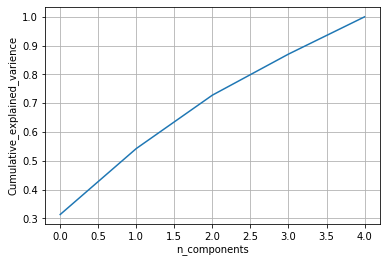

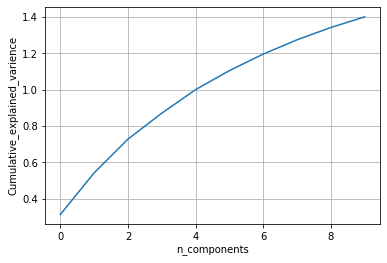

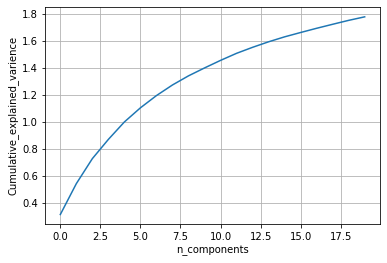

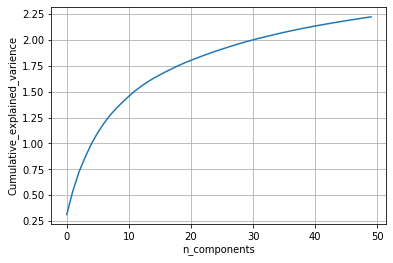

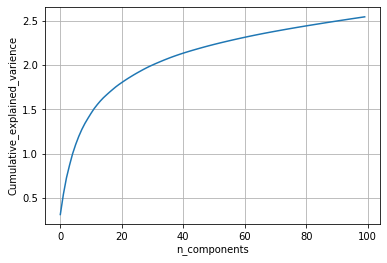

In [7]:
get_plot_pca(pca5) 
get_plot_pca(pca10) 
get_plot_pca(pca20)
get_plot_pca(pca50) 
get_plot_pca(pca100) 

__1.3.3.__ For each dataset obtained from PCA with given $n$ train a Logistic Regression model. Save their
performance and accuracy on `test` dataset.

In [8]:
model5, accuracy_on_test5 = model_fit(model, xTrain5, xTest5, yTrain5, yTest5)
model10, accuracy_on_test10 = model_fit(model, xTrain10, xTest10, yTrain10, yTest10)
model20, accuracy_on_test20 = model_fit(model, xTrain20, xTest20, yTrain20, yTest20)
model50, accuracy_on_test50 = model_fit(model, xTrain50, xTest50, yTrain50, yTest50)
model100, accuracy_on_test100 = model_fit(model, xTrain100, xTest100, yTrain100, yTest100)

C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#####################################################################################
Accuracy score on test :  0.9672310212998362
f1_score on test :  0.9670329670329669
Accuracy score on train :  1.0
f1_score on train :  1.0
#####################################################################################


C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#####################################################################################
Accuracy score on test :  0.9694050991501416
f1_score on test :  0.9700665188470067
Accuracy score on train :  1.0
f1_score on train :  1.0
#####################################################################################


C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#####################################################################################
Accuracy score on test :  0.9618233618233618
f1_score on test :  0.9621682665160927
Accuracy score on train :  1.0
f1_score on train :  1.0
#####################################################################################


C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#####################################################################################
Accuracy score on test :  0.964951950254381
f1_score on test :  0.9656319290465633
Accuracy score on train :  1.0
f1_score on train :  1.0
#####################################################################################


C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#####################################################################################
Accuracy score on test :  0.9656338028169014
f1_score on test :  0.9652025099828865
Accuracy score on train :  1.0
f1_score on train :  1.0
#####################################################################################


__1.4.__ Apply Factor Analysis technique to reduce dimentionality of your dataset. Use $n = (3, 5, 10, 20, 50)$ as a
number of factors.

In [9]:
transformer = FactorAnalysis(n_components=3, random_state=0)
data3_fa = transformer.fit_transform(trainDataX)
transformer = FactorAnalysis(n_components=5, random_state=0)
data5_fa = transformer.fit_transform(trainDataX)
transformer = FactorAnalysis(n_components=10, random_state=0)
data10_fa = transformer.fit_transform(trainDataX)
transformer = FactorAnalysis(n_components=20, random_state=0)
data20_fa = transformer.fit_transform(trainDataX)
transformer = FactorAnalysis(n_components=50, random_state=0)
data50_fa = transformer.fit_transform(trainDataX)
transformer = FactorAnalysis(n_components=100, random_state=0)
data100_fa = transformer.fit_transform(trainDataX)


def data_to_dataframe(X, number_of_components, Y):
    data = pd.DataFrame(data = X, columns = range(number_of_components))
    data['y'] = Y
    return data

data3_fa = data_to_dataframe(data3_fa, 3, trainDataY)
data5_fa = data_to_dataframe(data5_fa, 5, trainDataY)
data10_fa = data_to_dataframe(data10_fa, 10, trainDataY)
data20_fa = data_to_dataframe(data20_fa, 20, trainDataY)
data50_fa = data_to_dataframe(data50_fa, 50, trainDataY)
data100_fa = data_to_dataframe(data100_fa, 100, trainDataY)

__1.4.1.__ Visualize factors you obtained for $n = 3$.

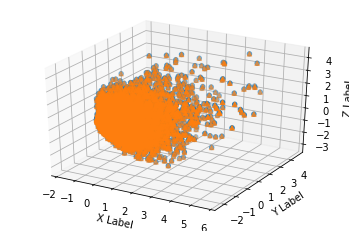

In [10]:
def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = data3_fa[0]
    ys = data3_fa[1]
    zs = data3_fa[2]
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

__1.4.2.__ For each datase obtained train a Logisitc Regression model. Save their performance and accuracy on `test` dataset.

In [16]:
model = LogisticRegression(random_state=0, solver='lbfgs')

xTrain, yTrain, xTest, yTest = get_split(data3_fa.drop(['y'], axis = 1), data3_fa['y'])


def model_fit(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test) 
    
    y_predict_train = model.predict(X_train) 
    
    print("#####################################################################################")
    print("Accuracy score on test : ",accuracy_score(y_test, y_predict_test))
    print("f1_score on test : ",f1_score(y_test, y_predict_test))
    print("Accuracy score on train : ",accuracy_score(y_train, y_predict_train))
    print("f1_score on train : ",f1_score(y_train, y_predict_train))
    print("#####################################################################################")
    return model, accuracy_score(y_test, y_predict_test) 


model3, accuracy_on_test3 = model_fit(model, xTrain, xTest, yTrain, yTest)

xTrain, yTrain, xTest, yTest = get_split(data5_fa.drop(['y'], axis = 1), data5_fa['y'])
model5, accuracy_on_test5 = model_fit(model, xTrain, xTest, yTrain, yTest)

xTrain, yTrain, xTest, yTest = get_split(data10_fa.drop(['y'], axis = 1), data10_fa['y'])
model10, accuracy_on_test10 = model_fit(model, xTrain, xTest, yTrain, yTest)

xTrain, yTrain, xTest, yTest = get_split(data20_fa.drop(['y'], axis = 1), data20_fa['y'])
model20, accuracy_on_test20 = model_fit(model, xTrain, xTest, yTrain, yTest)

xTrain, yTrain, xTest, yTest = get_split(data50_fa.drop(['y'], axis = 1), data50_fa['y'])
model50, accuracy_on_test50 = model_fit(model, xTrain, xTest, yTrain, yTest)

C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#####################################################################################
Accuracy score on test :  0.9650845608292417
f1_score on test :  0.9654054054054053
Accuracy score on train :  1.0
f1_score on train :  1.0
#####################################################################################


C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#####################################################################################
Accuracy score on test :  0.9723876556578235
f1_score on test :  0.9725658956428187
Accuracy score on train :  1.0
f1_score on train :  1.0
#####################################################################################


C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#####################################################################################
Accuracy score on test :  0.9754327191513121
f1_score on test :  0.9751412429378531
Accuracy score on train :  1.0
f1_score on train :  1.0
#####################################################################################


C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#####################################################################################
Accuracy score on test :  0.9771117166212534
f1_score on test :  0.9765886287625418
Accuracy score on train :  1.0
f1_score on train :  1.0
#####################################################################################


C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#####################################################################################
Accuracy score on test :  0.9663226507332972
f1_score on test :  0.966986155484558
Accuracy score on train :  1.0
f1_score on train :  1.0
#####################################################################################


__1.5.__ Compare performance/accuracy of original model with models trained on datasets obtained using PCA
and FA. What are the pros/cons of each approach? What are the main use-cases for those algorithms? (5-6
sentences)

\#\# You can place your answer here \#\#

In [ ]:
# PCA is used to preprocess and reduce the dimensionality of high-dimensional
# datasets while preserving the original structure and relationships inherent
# to the original dataset so that machine learning models can still learn from them and be used to make accurate predictions.
# FA can help you with condensing variables and uncovering clusters of responses.